In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
  
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./file-data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:

df.shape

(1338, 7)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

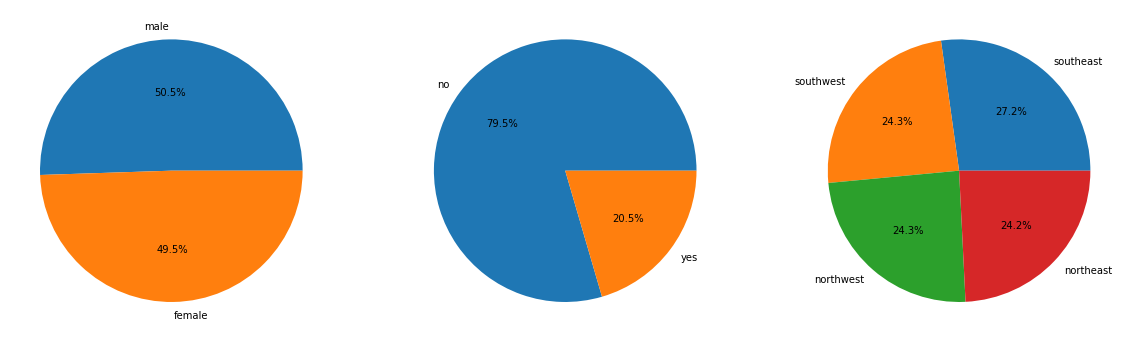

In [10]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()


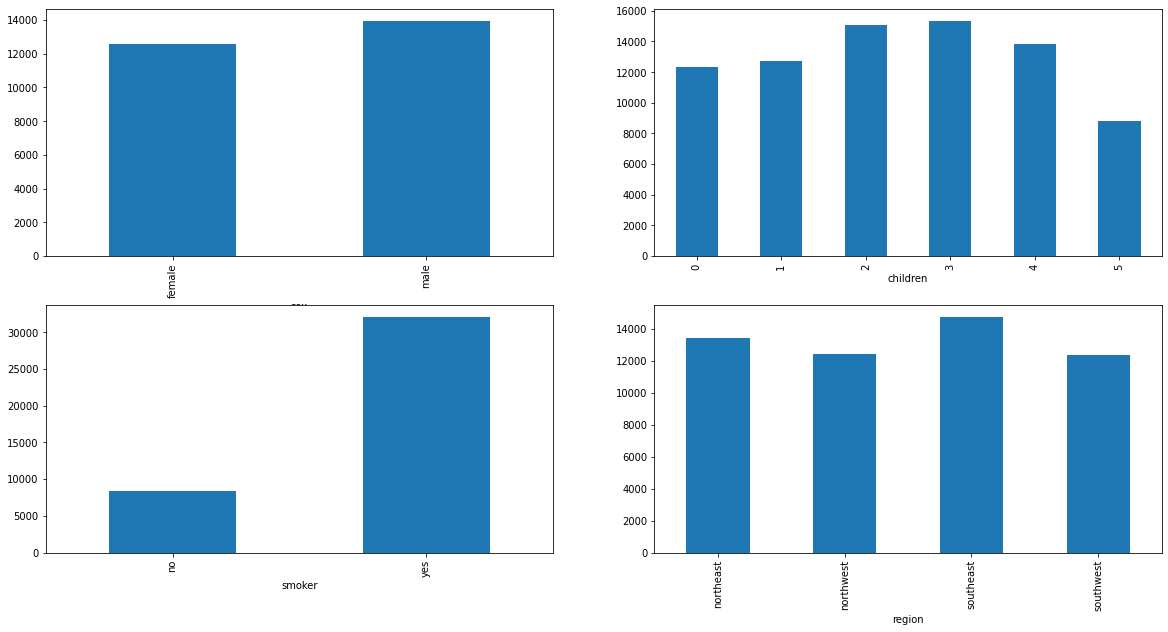

In [11]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	df.groupby(col).mean()['charges'].plot.bar()
plt.show()


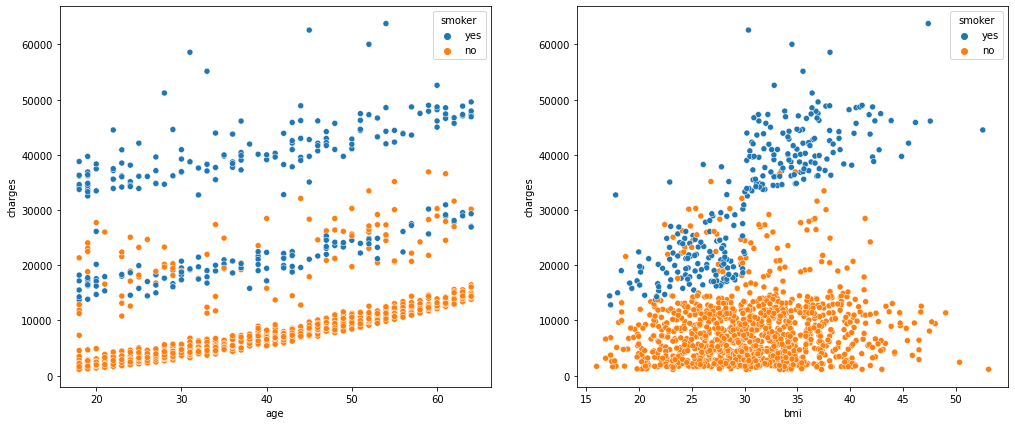

In [12]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sb.scatterplot(data=df, x=col,
				y='charges',
				hue='smoker')
plt.show()


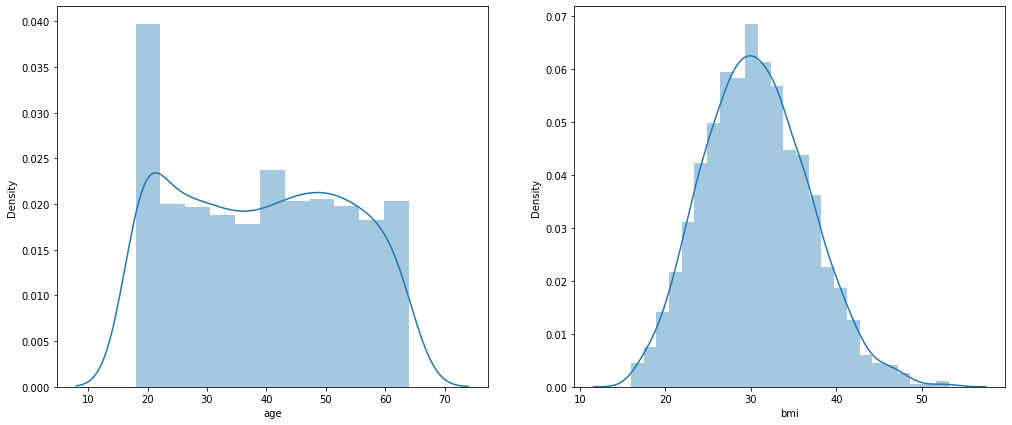

In [13]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sb.distplot(df[col])
plt.show()


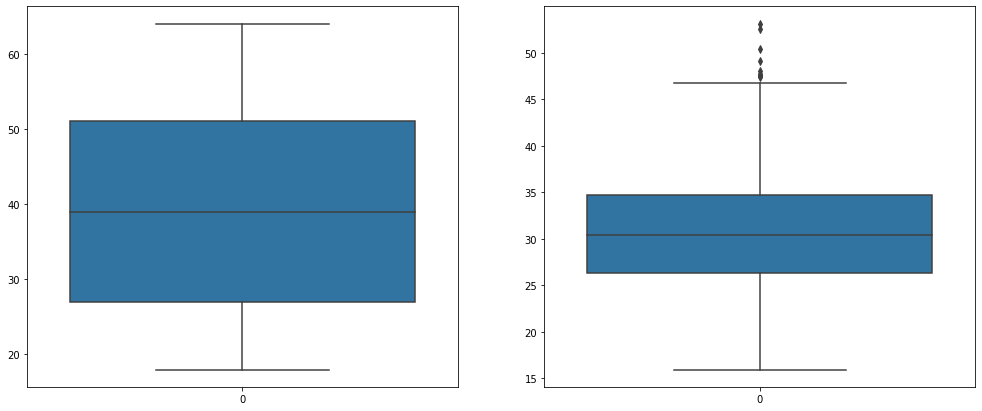

In [14]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sb.boxplot(df[col])
plt.show()


In [15]:
df.shape, df[df['bmi']<45].shape


((1338, 7), (1318, 7))

In [16]:
df = df[df['bmi']<45]


In [17]:
for col in df.columns:
	if df[col].dtype == object:
		le = LabelEncoder()
		df[col] = le.fit_transform(df[col])


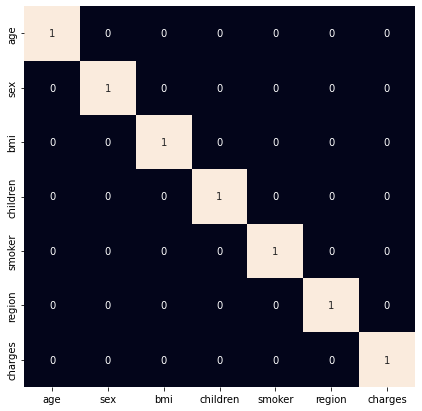

In [18]:
plt.figure(figsize=(7, 7))
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [19]:
features = df.drop('charges', axis=1)
target = df['charges']

X_train, X_val,\
Y_train, Y_val = train_test_split(features, target,
								test_size=0.2,
								random_state=22)
X_train.shape, X_val.shape


((1054, 6), (264, 6))

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [21]:
models = [LinearRegression(), XGBRegressor(),
		RandomForestRegressor(), AdaBoostRegressor(),
		Lasso(), Ridge()]

for i in range(6):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')
	pred_train = models[i].predict(X_train)
	print('Training Error : ', mape(Y_train, pred_train))

	pred_val = models[i].predict(X_val)
	print('Validation Error : ', mape(Y_val, pred_val))
	print()


LinearRegression() : 
Training Error :  0.4188805629224113
Validation Error :  0.4504495878121584

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) : 
Training Error :  0.0697883333923925
Validation Error :  0.36004392100129423

RandomForestRegressor() : 
Training Error :  0.11876049623239208
Validation Error :  0.25661323187017204

AdaBoostRegressor() : 
Tr